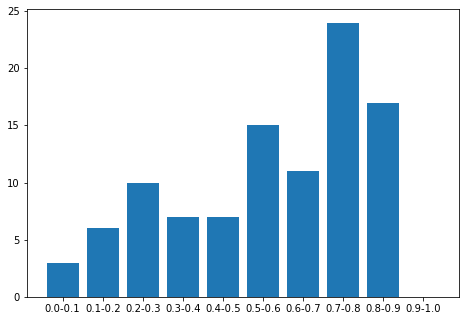

In [2]:
import math
import drawSvg as draw
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import *
import matplotlib.pyplot as plt
import random
import numpy as np



#no ideals
i=0
DList = []
while i<100:
    PList=randomPoints(3)
    Tri=Triangle.fromVertices(PList)
    delta = Tri.approx()
    DList.append(delta)
    i=i+1
j=0
k=0
l=0
m=0.1
CList=[]
while k<10:
    CList.append(0)
    k=k+1  
k=0
while k<10:
    j=0
    while j<100:
        if DList[j]<m and DList[j]>l: 
            CList[k]=CList[k]+1
        j=j+1
    l=l+0.1
    m=m+0.1  
    k=k+1    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
interval = ['0.0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0' ]
ax.bar(interval,CList)
plt.show()


In [3]:
from Triangle import Triangle
from constructions import randomPoints


#sample data
def sample(n=1000, precision=16, numIdeal=0):    
    i=0
    DList = []
    while i<n:
        PList=randomPoints(3,numIdeal)
        try:
            Tri=Triangle.fromVertices(PList)
            delta = Tri.approx(precision)
        except:
            continue
        DList.append(delta)
        i=i+1
    return DList

def Data(n, precision, i=0):
    return [sample(n, precision, k) for k in range(i+1)]



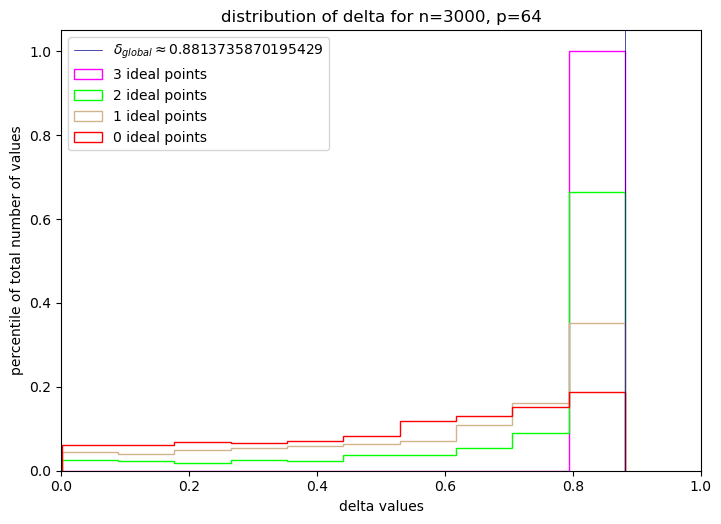

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from constructions import Data

n=3000
p=64
i=3

#data=Data(n,p,i)

#plot data
n_bins=len(data[0])//300

colors=['red', 'tan', 'lime', 'magenta']
labels=['0 ideal points', '1 ideal points', '2 ideal points', '3 ideal points']
colors=[s for k,s in enumerate(colors) if k<len(data)]
labels=[s for k,s in enumerate(labels) if k<len(data)]

gdelta=np.log(1+2**0.5)


fig,ax = plt.subplots(1,1, figsize=(8+1/4, 5+5/6), dpi=100)
fig.patch.set_facecolor('white')
ax.hist(data, bins=n_bins, weights=np.full((len(data[0]),len(data)),1/n), histtype='step', color=colors, label=labels)
ax.axvline(gdelta, color='darkblue', linewidth=0.5, label=r'$\delta_{global} \approx$'+'{}'.format(gdelta))
ax.set_title("distribution of delta for n={}, p={}".format(n,p))
ax.legend()
#ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, gdelta, 1])
ax.set_xlim(0,1)
ax.set_xlabel('delta values')
ax.set_ylabel('percentile of total number of values')
plt.show()

